In [92]:
import os
import re
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [56]:
LIT_PATH = 'data/literature_t0/'
TC_PATH = 'data/t0/'

In [64]:
literature = {}
for file in sorted(os.listdir(LIT_PATH)):
    element = file.strip('.xlsx')
    literature[element] = pd.read_excel(os.path.join(LIT_PATH, file))

thermocalc = {}
for file in sorted(os.listdir(TC_PATH)):
    element = file.strip('.csv')
    thermocalc[element] = pd.read_csv(os.path.join(TC_PATH, file), index_col=0)

In [40]:
LABEL_COLORS = {
    'Af (C)': '#d62728',
    'As (C)': '#1f77b4',
    'Ms (C)': '#ff7f0e',
    'Mf (C)': '#2ca02c',
}

In [107]:
def plot_regression(x, y, ax, color=None):
    slope, intercept, *_ = linregress(x, y)
    
    y_pred = slope * x + intercept
    
    ax.plot(x, y_pred, color=color, label='_nolegend_')

def to_mol_percent(df, element):
    x = df.index / 100

    s = df.index.name
    num = re.findall(element + '(\d)O', s)
    if len(num) == 0:
        return 100 * x

    return 100 * x / (int(num[0]) - x)

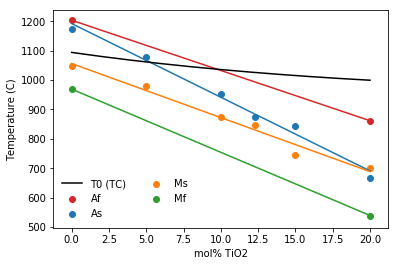

In [96]:
fig, ax = plt.subplots()

df = literature['Ti']
mean = df.groupby(df.columns[0]).mean()

for label, color in LABEL_COLORS.items():
    x = to_mol_percent(mean[label].dropna(), 'Ti')
    y = mean[label].dropna().values

    ax.scatter(
        x, y,
        label=label.strip(' (C)'),
        color=color
    )
    plot_regression(
        x, y,
        ax,
        color
    )

tc = thermocalc['Ti']
xtc = to_mol_percent(tc, 'Ti')
ax.plot(
    xtc, tc['T0 (K)'] - 273,
    'k-',
    label='T0 (TC)'
)
ax.legend(frameon=False, ncol=2, loc='lower left')

ax.set_xlabel(df.columns[0])
ax.set_ylabel('Temperature (C)')
plt.show()

In [115]:
literature['Y']

,mol% YO1.5,Ms (C),Mf (C),As (C),Af (C),mol%Y2O3
0,0.000000,1048.000000,920.000000,1179.000000,1190.000000,0.0000
1,0.000000,1046.000000,925.000000,1174.000000,1189.000000,0.0000
2,0.000000,NaN,NaN,1204.425089,NaN,0.0000
3,0.000000,1002.631579,NaN,1200.000000,NaN,0.0000
4,0.000000,1034.000000,975.000000,1185.000000,1220.000000,0.0000
5,0.000000,1062.000000,934.000000,1168.000000,1203.000000,0.0000
6,0.000000,1037.000000,997.000000,1157.000000,1182.000000,0.0000
7,0.000000,1072.108186,NaN,1168.707322,NaN,0.0000
8,0.000000,1038.000000,993.000000,1160.000000,1215.000000,0.0000
9,0.000000,1045.000000,975.000000,1152.000000,1206.000000,0.0000


In [114]:
thermocalc['Y']

,T0 (K),Ms (K)
mol%Y2O3iO2,,
0.0,1367.000000,1217.000000
0.5,1125.772584,973.371700
1.0,879.668064,725.024264
1.5,629.557866,472.842553


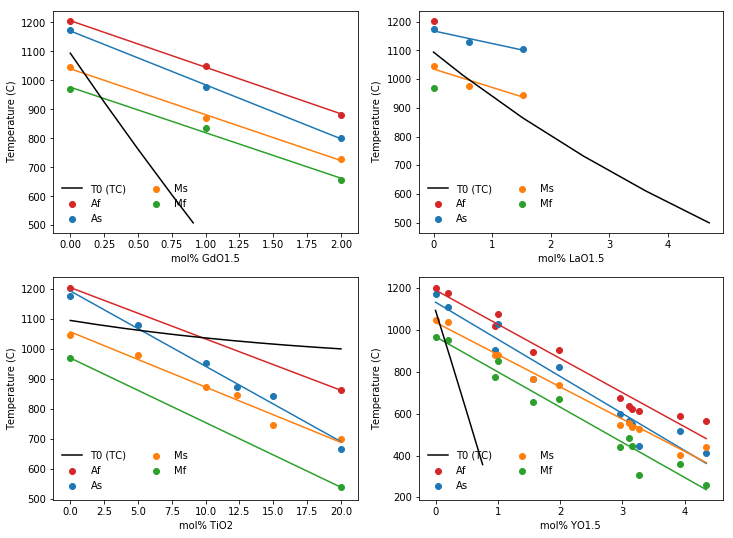

In [112]:
fig, ax_fig = plt.subplots(2, 2, figsize=(12, 9))

for (element, df), ax in zip(literature.items(), ax_fig.reshape(-1)):

    mean = df.groupby(df.columns[0]).mean()

    for label, color in LABEL_COLORS.items():
        x = to_mol_percent(mean[label].dropna(), element)
        y = mean[label].dropna().values

        ax.scatter(
            x, y,
            label=label.strip(' (C)'),
            color=color
        )
        plot_regression(
            x, y,
            ax,
            color
        )

    tc = thermocalc[element]
    xtc = to_mol_percent(tc, element)
    ax.plot(
        xtc, tc['T0 (K)'] - 273,
        'k-',
        label='T0 (TC)'
    )
    ax.legend(frameon=False, ncol=2, loc='lower left')

    ax.set_xlabel(df.columns[0])
    ax.set_ylabel('Temperature (C)')
plt.show()